In [2]:
import numpy as np
import pandas as pd
%matplotlib inline 


In [3]:
import statsmodels.api as sm

In [4]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV,Lasso, LassoCV, ElasticNet,ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [7]:
pd.set_option('display.max_columns', None) # displays all pd columns

# Try with original housing data

In [8]:
housing = pd.read_csv('../../Ames_HousePrice.csv', index_col=0)

In [9]:
real_estate = pd.read_csv('../../Ames Real Estate Data.csv', index_col=0)

In [10]:
price = housing["SalePrice"]

In [11]:
int_df = housing.select_dtypes(include='int64')
int_df

,PID,GrLivArea,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,7890,6,6,1939,1950,856,0,0,1,0,2,1,4,1,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,4235,5,5,1984,1984,1049,0,0,2,0,2,1,5,0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,6060,5,9,1930,2007,1001,0,0,1,0,2,1,5,0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,8146,4,8,1900,2003,717,322,0,1,0,2,1,6,0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,8400,8,6,2001,2001,810,855,0,2,1,3,1,6,0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,8854,6,6,1916,1950,952,0,0,1,0,2,1,4,1,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,13680,3,5,1955,1955,1733,0,0,2,0,4,1,8,1,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,6270,5,6,1949,1950,1001,1001,0,2,0,4,2,8,0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,8826,7,5,2000,2000,985,857,0,2,1,3,1,7,1,193,96,0,0,0,0,0,7,2007


In [12]:
int_df.isnull().sum().sort_values(axis=0, ascending=False)

PID              0
BedroomAbvGr     0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
HalfBath         0
GrLivArea        0
FullBath         0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
MSSubClass       0
SalePrice        0
YrSold           0
dtype: int64

In [13]:
x = sm.add_constant(int_df)
model = sm.OLS(np.log(price), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1546.
Date:                Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                        06:14:48   Log-Likelihood:                 2422.4
No. Observations:                2580   AIC:                            -4791.
Df Residuals:                    2553   BIC:                            -4633.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.1540      2.921      3.477

In [14]:
rm_pvalues = results.pvalues[results.pvalues > 0.05]
rm_pvalues

PID             0.313170
MSSubClass      0.068097
2ndFlrSF        0.727850
LowQualFinSF    0.855165
HalfBath        0.339207
TotRmsAbvGrd    0.445227
WoodDeckSF      0.291387
OpenPorchSF     0.506901
3SsnPorch       0.099312
PoolArea        0.669934
MiscVal         0.770867
MoSold          0.837923
YrSold          0.103881
dtype: float64

In [15]:
int_df.drop(columns=rm_pvalues.index, inplace=True)

In [16]:
y = int_df.SalePrice

In [17]:
int_df.drop(columns='SalePrice', inplace=True)

In [18]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(int_df, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1806, 13)
X_test : (774, 13)
y_train : (1806,)
y_test : (774,)


# Try with Group's Train-Test Split

In [19]:
#pull in group's train-test split
X_train = pd.read_csv('../../group train-test split/X_train42.csv')
X_test = pd.read_csv('../../group train-test split/X_test42.csv')
y_train = pd.read_csv('../../group train-test split/y_train42.csv')
y_test = pd.read_csv('../../group train-test split/y_test42.csv')


In [20]:
X_train.isnull().sum().sort_values(axis=0, ascending=False)

GrLivArea                 0
Exterior2nd__Wd Sdng      0
MasVnrType__BrkCmn        0
MasVnrType__BrkFace       0
MasVnrType__NA            0
                         ..
Neighborhood__Sawyer      0
Neighborhood__SawyerW     0
Neighborhood__Somerst     0
Neighborhood__StoneBr     0
SaleCondition__Partial    0
Length: 230, dtype: int64

In [21]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (2046, 230)
X_test : (512, 230)
y_train : (2046, 1)
y_test : (512, 1)


In [22]:
# Define models
model_linear = LinearRegression()
model_ridge = Ridge(alpha = 1)
model_lasso = Lasso(alpha = .00008)
model_net = ElasticNet(alpha = .00007)
#model_tree = DecisionTreeRegressor()
#model_ran = RandomForestRegressor()
#model_xg = XGBRegressor()

In [23]:
# combine R^2 score and RMSE into one print function to reduce redundancy, blah
def print_score(test, pred, model): 
    """
    Create func to print R^2 and RMSE
    """
    r2_ = r2_score(test, pred)
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    
    print(f"- Model: {model}")
    print(f"R²: {r2_}")
    print(f"RMSE: {rmse_}\n")

In [24]:
def train_test_score(model, xtrain, ytrain, xtest, ytest):
    """
    Create func to print train and test scores
    """
    
    train_score = model.score(xtrain, ytrain)
    test_score = model.score(xtest, ytest)
    
    print(f"- Model: {model}")
    print(f"Train Score: {train_score}")
    print(f"Test Score: {test_score}\n")

## Linear Model

In [54]:
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
print_score(y_test, y_pred_linear, "Linear Regression")

- Model: Linear Regression
R²: 0.9182864163090891
RMSE: 21496.1411933915



In [56]:
train_test_score(model_linear, X_train, y_train, X_test, y_test)

print(f"Train Score: {model_linear.score(X_train, y_train)}")
print(f"Test Score: {model_linear.score(X_test, y_test)}")

- Model: LinearRegression()
Train Score: 0.9371207742775772
Test Score: 0.9182864163090891

Train Score: 0.9371207742775772
Test Score: 0.9182864163090891


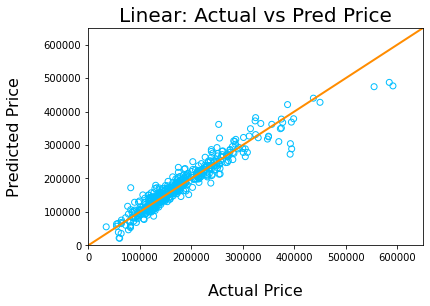

In [27]:
plt.figure()
plt.title("Linear: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_linear,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [28]:
model_linear.fit(X_train, np.log(y_train))
logy_pred_linear = model_linear.predict(X_test)
print_score(y_test, np.exp(logy_pred_linear), "Log Linear Inputs")

- Model: Log Linear Inputs
R²: 0.9330641593898489
RMSE: 19455.515302592987



In [30]:
train_test_score(model_linear, X_train, np.log(y_train), X_test, np.log(y_test))

- Model: LinearRegression()
Train Score: 0.9418013723456784
Test Score: 0.9231511364639181



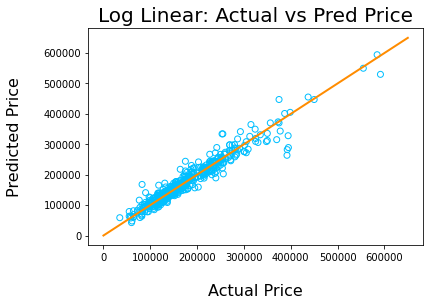

In [31]:
plt.figure()
plt.title("Log Linear: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_linear),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [32]:
# log1p y linear model
model_linear.fit(X_train, np.log1p(y_train))
log1py_pred_linear = model_linear.predict(X_test)
print_score(y_test, np.expm1(logy_pred_linear), "Log1p Linear Inputs")

- Model: Log1p Linear Inputs
R²: 0.9330641483124972
RMSE: 19455.51691245981



## Ridge Model

In [33]:
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, y_pred_ridge, "Ridge")

- Model: Ridge
R²: 0.9210841889360748
RMSE: 21124.935391458483



In [34]:
train_test_score(model_ridge, X_train, y_train, X_test, y_test)

- Model: Ridge(alpha=1)
Train Score: 0.9358258284094735
Test Score: 0.9210841889360748



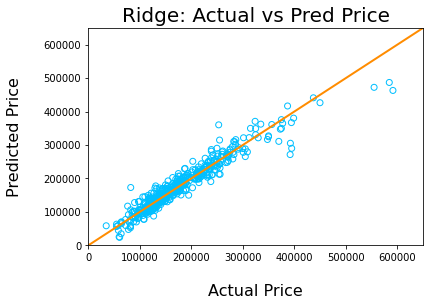

In [35]:
plt.figure()
plt.title("Ridge: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_ridge,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [40]:
model_ridge.fit(X_train, np.log(y_train))
logy_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, np.exp(logy_pred_ridge), "Log Ridge Inputs")

- Model: Log Ridge Inputs
R²: 0.9351512959830791
RMSE: 19149.790530732



In [42]:
train_test_score(model_ridge, X_train, np.log(y_train), X_test, np.log(y_test))

- Model: Ridge(alpha=1)
Train Score: 0.9408301310224103
Test Score: 0.9270527121390895



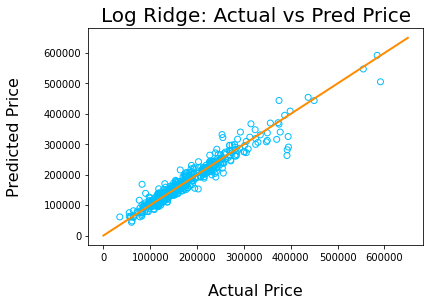

In [43]:
plt.figure()
plt.title("Log Ridge: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_ridge),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [44]:
# log1p y ridge model
model_ridge.fit(X_train, np.log1p(y_train))
log1py_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, np.expm1(logy_pred_ridge), "Log1p Ridge Inputs")

- Model: Log1p Ridge Inputs
R²: 0.9351511594248405
RMSE: 19149.81069351187



## Lasso Model

In [47]:
# lasso model
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, y_pred_lasso, "Lasso")

- Model: Lasso
R²: 0.918311816491203
RMSE: 21492.799959818934



In [48]:
train_test_score(model_lasso, X_train, y_train, X_test, y_test)

- Model: Lasso(alpha=8e-05)
Train Score: 0.9371207568143749
Test Score: 0.918311816491203



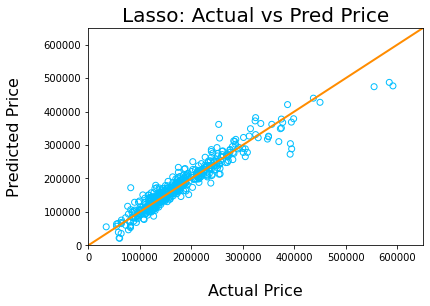

In [49]:
# plot lasso model
plt.figure()
plt.title("Lasso: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_lasso,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [51]:
# log y lasso model
model_lasso.fit(X_train, np.log(y_train))
logy_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, np.exp(logy_pred_lasso), "Log Lasso Inputs")

- Model: Log Lasso Inputs
R²: 0.9359614968306254
RMSE: 19029.788578568023



In [52]:
train_test_score(model_lasso, X_train, np.log(y_train), X_test, np.log(y_test))

- Model: Lasso(alpha=8e-05)
Train Score: 0.9394247704829012
Test Score: 0.9294791515755348



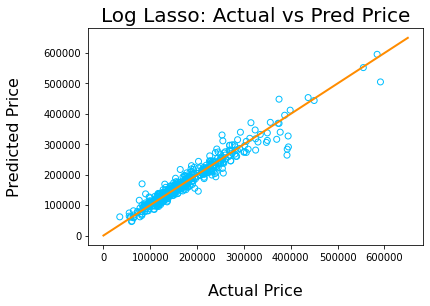

In [105]:
# plot log y lasso model
plt.figure()
plt.title("Log Lasso: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_lasso),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [106]:
# log1p y lasso model
model_lasso.fit(X_train, np.log1p(y_train))
log1py_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, np.expm1(logy_pred_lasso), "Log1p Lasso Inputs")

- Regressor: Log1p Lasso Inputs
R²: 0.9359613339578544
RMSE: 19029.812778324977



## ElasticNet Model

In [107]:
# net model
model_net.fit(X_train, y_train)
y_pred_net = model_net.predict(X_test)
print_score(y_test, y_pred_net, "ElasticNet")

- Regressor: ElasticNet
R²: 0.9188607545350779
RMSE: 21420.46328452892



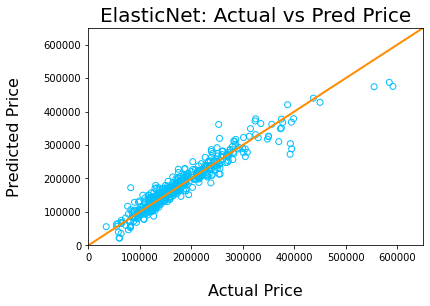

In [108]:
# plot net model
plt.figure()
plt.title("ElasticNet: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_net,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [109]:
# log y net model
model_net.fit(X_train, np.log(y_train))
logy_pred_net = model_net.predict(X_test)
print_score(y_test, np.exp(logy_pred_net), "Log ElasticNet Inputs")

- Regressor: Log ElasticNet Inputs
R²: 0.9360027734441305
RMSE: 19023.654676281694



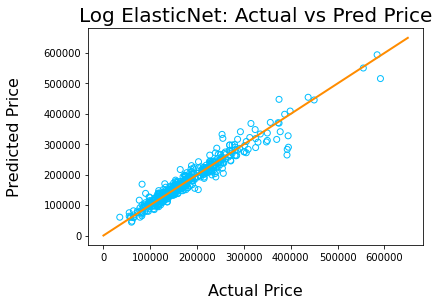

In [110]:
# plot log y net model
plt.figure()
plt.title("Log ElasticNet: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_net),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [118]:
# log1p y net model
model_net.fit(X_train, np.log1p(y_train))
log1py_pred_net = model_net.predict(X_test)
print_score(y_test, np.expm1(logy_pred_net), "Log1p ElasticNet Inputs")

- Regressor: Log1p ElasticNet Inputs
R²: 0.9360026473144446
RMSE: 19023.673422769138



## Decision Tree Model

In [153]:
model_tree = DecisionTreeRegressor(criterion='absolute_error')
model_ran = RandomForestRegressor()
model_xg = XGBRegressor()

In [154]:
# tree model
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print_score(y_test, y_pred_tree, "Decision Tree")

- Regressor: Decision Tree
R²: 0.765146131483524
RMSE: 36442.84184857158



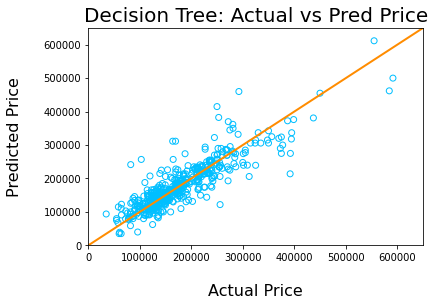

In [159]:
# plot tree model
plt.figure()
plt.title("Decision Tree: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, y_pred_tree,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlim(0, 650000)
plt.ylim(0, 650000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [156]:
# log y tree model
model_tree.fit(X_train, np.log(y_train))
logy_pred_tree = model_tree.predict(X_test)
print_score(y_test, np.exp(logy_pred_tree), "Log Decision Tree Inputs")

- Regressor: Log Decision Tree Inputs
R²: 0.7816647777228954
RMSE: 35137.85760176333



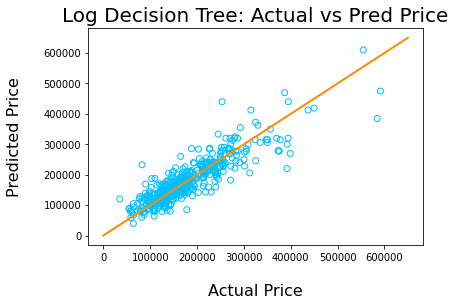

In [160]:
# plot log y tree model
plt.figure()
plt.title("Log Decision Tree: Actual vs Pred Price", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_tree),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [158]:
# log1p y tree model
model_tree.fit(X_train, np.log1p(y_train))
log1py_pred_tree = model_tree.predict(X_test)
print_score(y_test, np.expm1(logy_pred_tree), "Log1p Decision Tree Inputs")

- Regressor: Log1p Decision Tree Inputs
R²: 0.781664873134079
RMSE: 35137.849924245915

